In [1]:
import sympy as smp
import numpy as np
from scipy import *
from scipy.integrate import *
import math
import IPython as ipy
from sympy import*
import matplotlib.pyplot as plt

#### DIsplay of Case Study

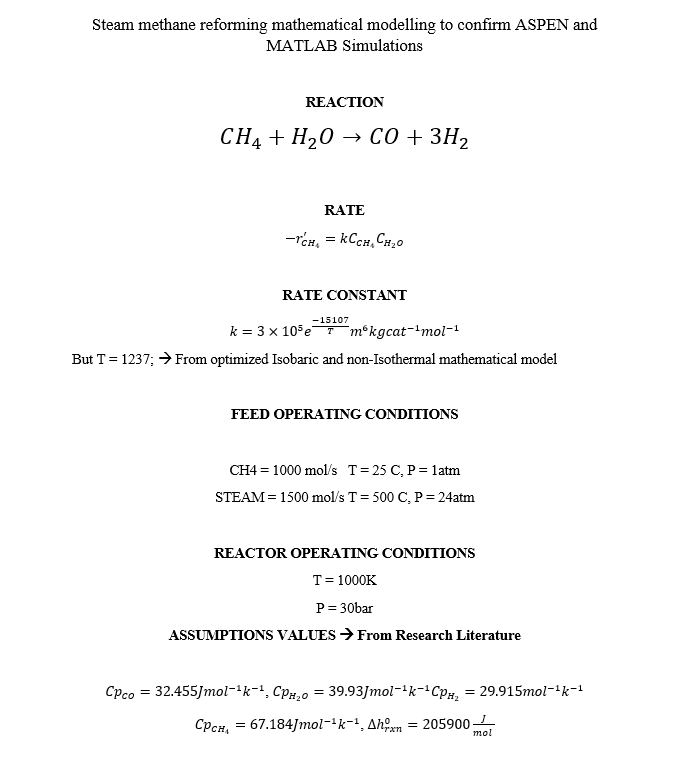

In [2]:
ipy.display.Image(r'C:\Users\Joe\Desktop\coding\Matlab Revise\mathematical_model_question.png')

#### DIsplay of Matlab Results

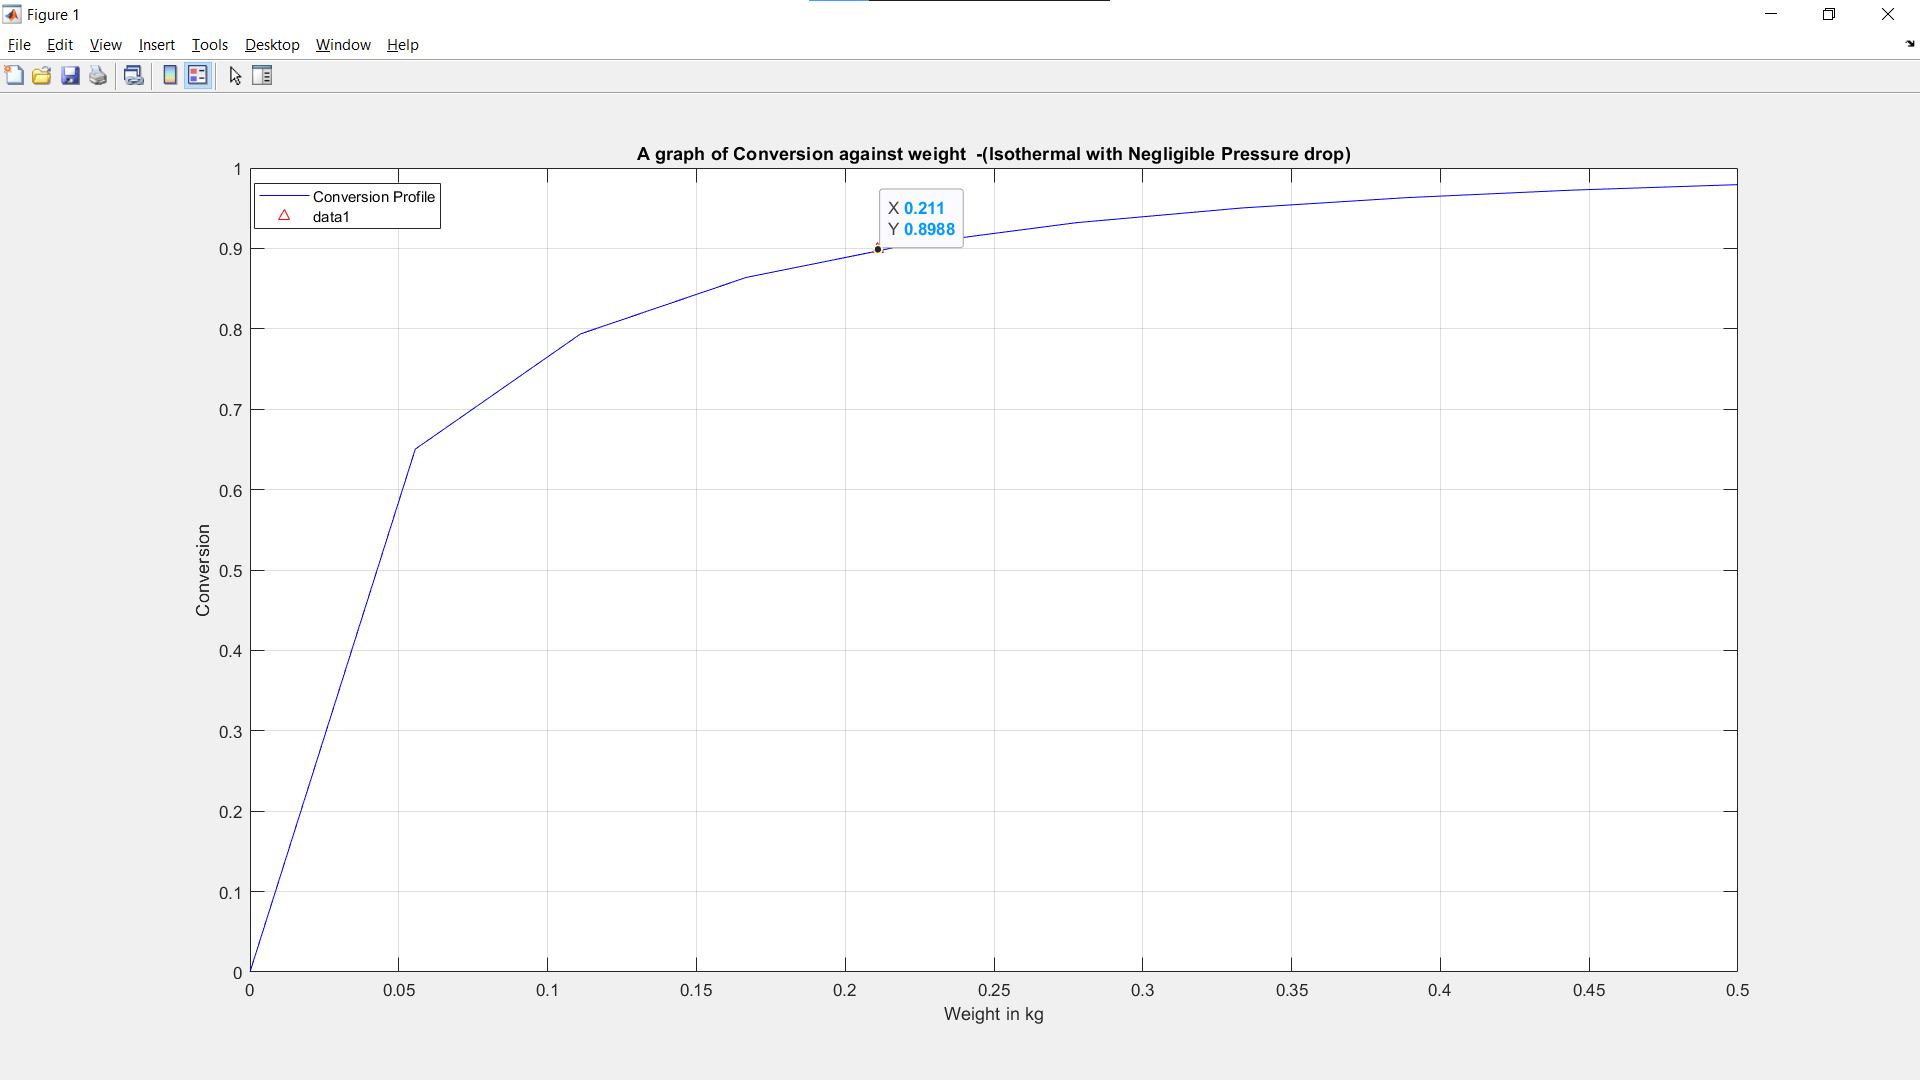

In [3]:
ipy.display.Image(r'C:\Users\Joe\Desktop\coding\Matlab Revise\Isothermal_Isobaric_Steam_methane_Reforming_Process.png')

##### Assumptions
1. Isothermal and Isobaric Process
2. Gas Phase Reaction
3. Packed Bed Reactor, PBR



##### Define Expresions

In [4]:
x,dF,dW,rate,FAo,dX,k,CA,CB,T,CAo = symbols('x dF dW rate FAo dX k CA CB T CAo',real = True,positive = True)
epsilon,X,rate,FBo,W,r,DW,D_W,w,FA_O = symbols('epsilon X rate FBo W r DW D_W w FA_O',real = True,positive = True)

##### Mass Balance

In [5]:
dW = dF/r
dW

dF/r

##### Mass Balance with conversion

In [6]:
dw_1 = FA_O * dX / r
dW_1 = Eq(D_W,dw_1)
dW_1 

Eq(D_W, FA_O*dX/r)

##### Rate Expression

In [7]:
FAo = 1000
FBo = 1500
phi = FBo/FAo
yAo = FAo/(FAo+FBo)
epsilon = ((4-2)*yAo)
Po = 30*(10**5) # Pascal
R = 8.314
To =1000 #Kelvin
CAo = round(((Po/(R*To)) * yAo),4)
T = 1237 #Kelvin
k = round(3 * 10 **5 * smp.exp(-15107/T),4)
CA = (CAo *(1-X))/(1+epsilon*X)
CB = (CAo *(phi-X))/(1+epsilon*X)
rate = k * CA * CB

##### Final Rate Expression

In [8]:
rate_equation = Eq(r,rate)
rate_equation

Eq(r, 1.4902*(144.3349 - 144.3349*X)*(216.50235 - 144.3349*X)/(0.8*X + 1)**2)

###### Confirming MATLAB mathematical modeling solution with hand calculation ie. 
###### conversion, X = 08988, weight = 0.211

In [9]:
###Recalling BALANCE model
equate = (FAo) *dX/ (rate)
exp = Eq(DW,equate)
exp


Eq(DW, 671.05*dX*(0.8*X + 1)**2/((144.3349 - 144.3349*X)*(216.50235 - 144.3349*X)))

In [10]:
##### Introducing integral on both sides
left_hand_side = smp.Integral(W)
right_hand_side = smp.Integral(X)
#right_hand_side
expresion = Eq((left_hand_side),((right_hand_side)*equate))
expresion


Eq(Integral(W, W), 671.05*dX*(0.8*X + 1)**2*Integral(X, X)/((144.3349 - 144.3349*X)*(216.50235 - 144.3349*X)))

In [11]:
equate_cal = equate = (FAo) / (rate)
#equate_cal

In [12]:
conversion = 0.8988
Weight = smp.integrate(equate_cal,(X,0,conversion)).round(4)
print(f'Therefore given a conversion of {conversion}, the weight of' 
      + 'catalyst calculated by hand is {Weight}')
print(f'This confirms MATLAB"s conversion of 0.8988, the weight'
      + 'of catalyst calculated by hand is 0.211')

Therefore given a conversion of 0.8988, the weight ofcatalyst calculated by hand is {Weight}
This confirms MATLAB"s conversion of 0.8988, the weightof catalyst calculated by hand is 0.211


##### Compare MATLAB Results to Hand Calculation

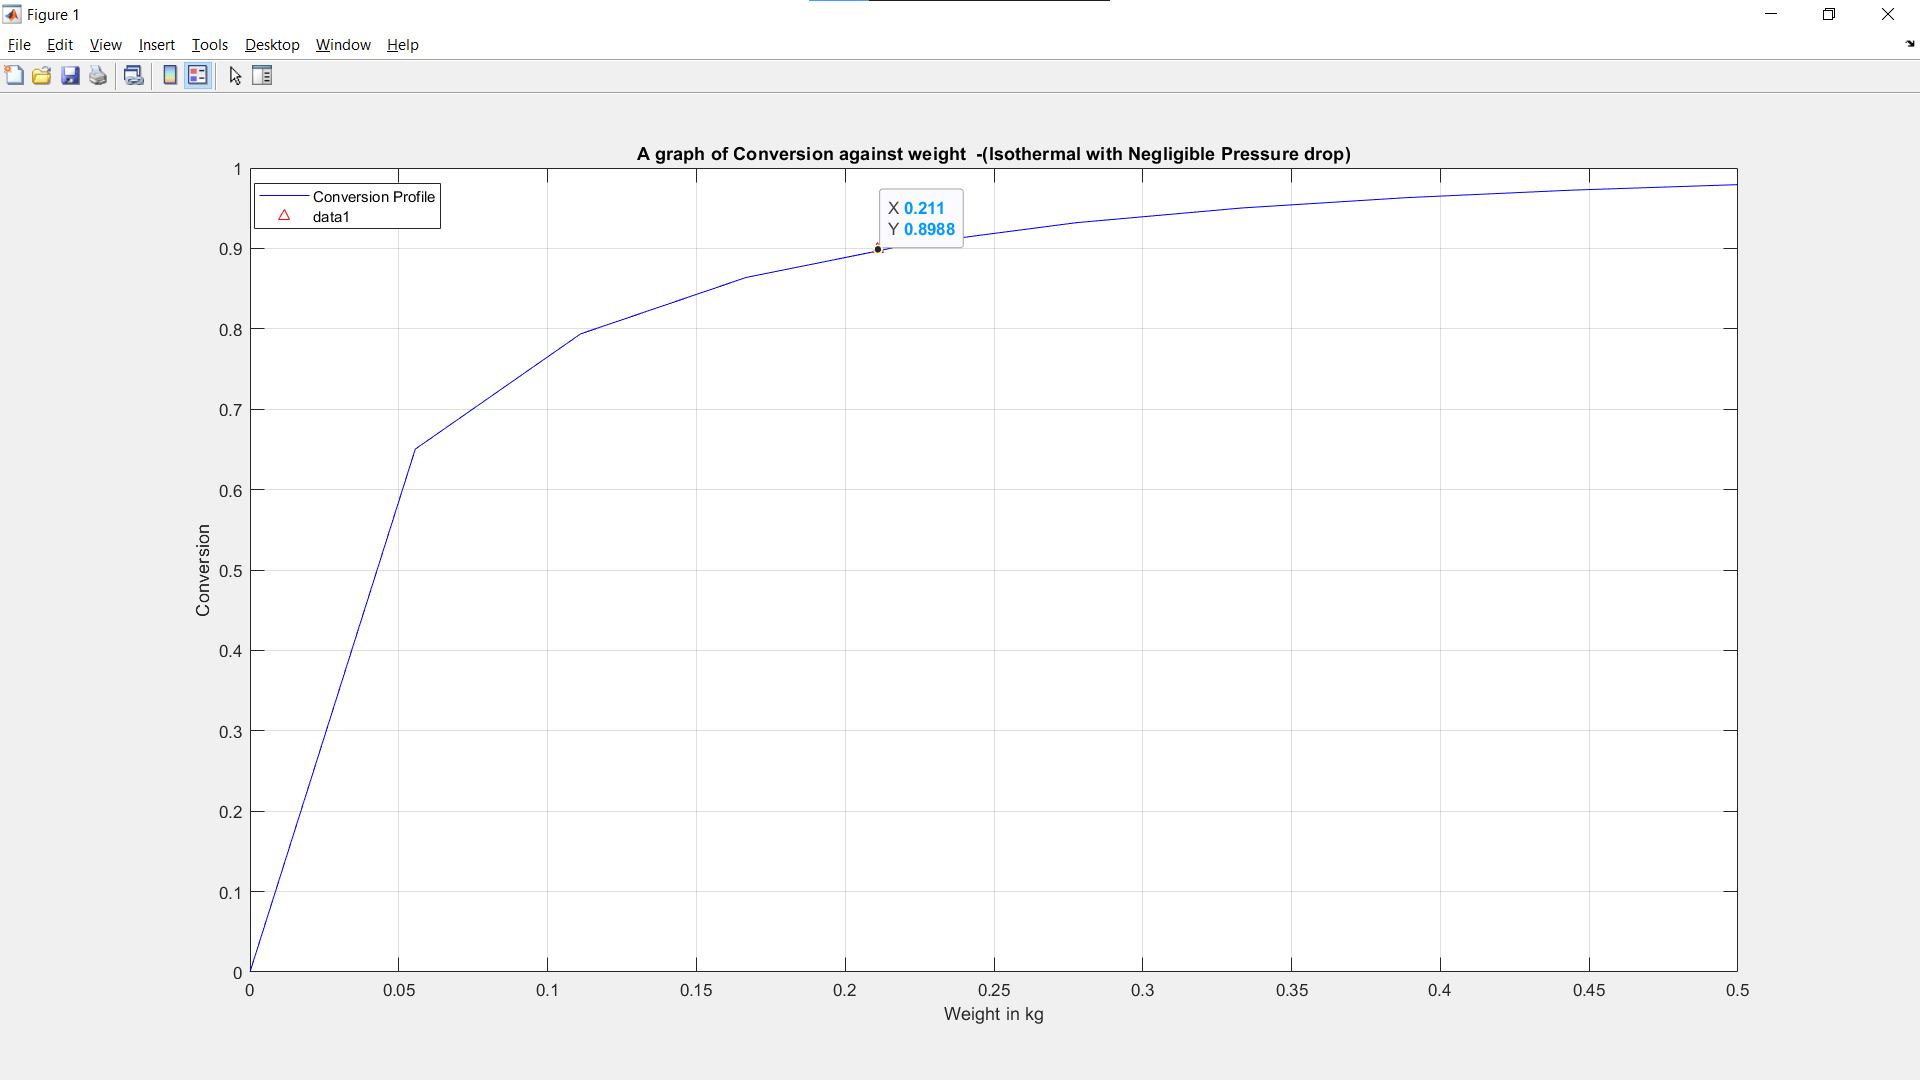

In [13]:
ipy.display.Image(r'C:\Users\Joe\Desktop\coding\Matlab Revise\Isothermal_Isobaric_Steam_methane_Reforming_Process.png')

##### A different graph but considering changes in temperature across the reactore hence non-isothermal

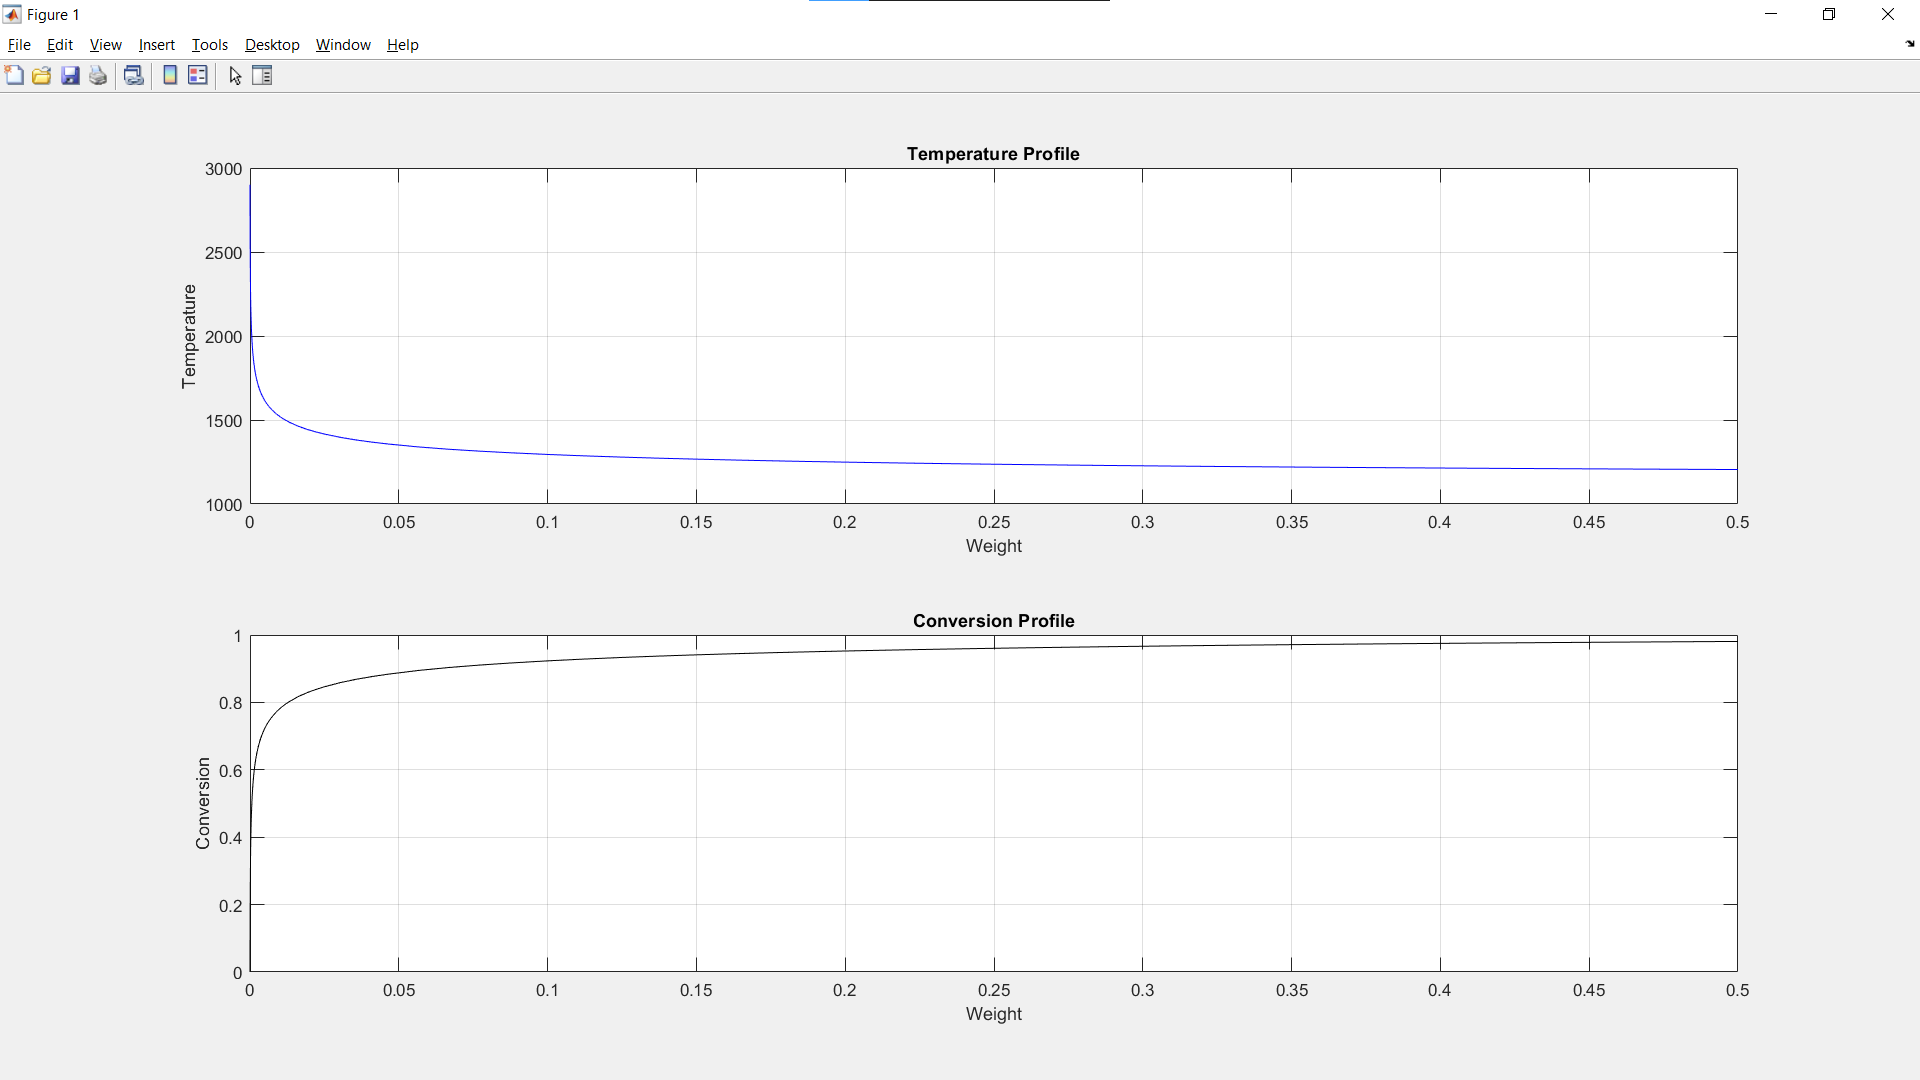

In [14]:
ipy.display.Image(r'C:\Users\Joe\Desktop\coding\Matlab Revise\non-Isothermal_with_isobaric process.png')

#### MATLAB code for graph 1 ie. Neligible Pressure drop and Isothermal

#### MATLAB code for graph 2 ie. Neligible Pressure drop but change in Temperature

##### Python Code to Confirm Matlab and Hand Calculations

In [15]:
FAo= 1000# mol/sec
FBo= 1800# mol/sec
To=2800#Kelvin
Po=30*(10**5)#Pascal
CpCO=32.455#J/mol/Kelvin
CpH2O=39.93#J/mol/Kelvin
CpH2=29.915#J/mol/Kelvin
CpCH4=67.184#J/mol/Kelvin
standard_enthalpy_reaction=205900#J/mol
min = 0#min starting integration value
max = 5#max starting integrating value

def model(X,w):
    x = X[0]
    y = X[1]
    T_Reference = 298
    R=8.314
    yAo=FAo/(FBo+FAo)
    CAo= (yAo*Po)/(R*To)
    delta_Cp= (3*CpH2)+CpCO-CpH2O-CpCH4
    Phi_B=FBo/FAo
    epsilon = yAo*((3+1)-(1+1))
    CA=(CAo*(1-y)*To)/(x*(1+(epsilon*y)))
    CB=(CAo*(Phi_B-y)*To)/(x*(1+(epsilon*y)))
    k=(3*(10**5))*math.exp((-15107/x))
    Rate=k*CA*CB
    H_rxn_T=standard_enthalpy_reaction+ delta_Cp*(x-T_Reference)
    dxdt = ((-H_rxn_T*Rate)/(FAo*(delta_Cp*y+(CpCH4+Phi_B*CpH2O))))
    dydt = (Rate/FAo)
    dzdt = [dxdt,dydt]
    return dzdt


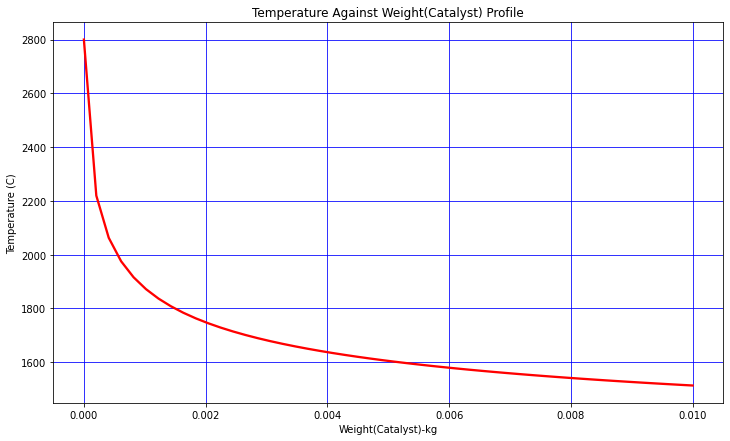

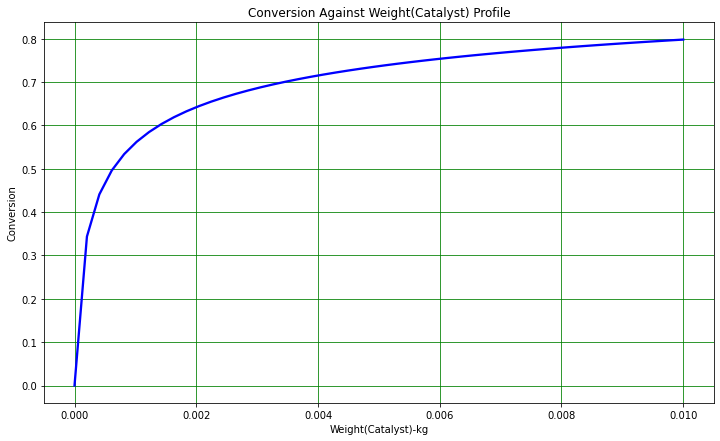

In [16]:

zo = [2800, 0]
w = np.linspace(0,0.01)
o = odeint(model,zo,w)

plt.figure(figsize=(12,7))
plt.plot(w,o[:,0],c= 'r', linewidth=2.3)
plt.title('Temperature Against Weight(Catalyst) Profile')
plt.xlabel('Weight(Catalyst)-kg')
plt.ylabel('Temperature (C)')
plt.grid(c='b')
plt.show()
plt.figure(figsize=(12,7))
plt.plot(w,o[:,1],c= 'b', linewidth=2.3)
plt.title('Conversion Against Weight(Catalyst) Profile')
plt.xlabel('Weight(Catalyst)-kg')
plt.ylabel('Conversion')
plt.grid(c= 'g')
plt.show()


In [17]:
## Calculate the Initial and Final Concentrations
def model(x,y,w):
    T_Reference = 298
    R=8.314
    yAo=FAo/(FBo+FAo)
    CAo= (yAo*Po)/(R*To)
    CBo =  ((1-yAo)*Po)/(R*To)
    #delta_Cp= (3*CpH2)+CpCO-CpH2O-CpCH4
    Phi_B=FBo/FAo
    epsilon = yAo*((3+1)-(1+1))
    CA=(CAo*(1-y)*To)/(x*(1+(epsilon*y)))
    CC=(CAo*(y)*To)/(x*(1+(epsilon*y)))
    CD=(CAo*(3*y)*To)/(x*(1+(epsilon*y)))
    CB=(CAo*(Phi_B-y)*To)/(x*(1+(epsilon*y)))
    k=(3*(10**5))*math.exp((-15107/x))
    #Rate=k*CA*CB
    #H_rxn_T=standard_enthalpy_reaction+ delta_Cp*(x-T_Reference)
    dzdt = [CA,CB,CC,CD,CAo,CBo]
    return dzdt


#### Concentration Calculations with corresponding conversion and Temperature from the graph


In [18]:
CA,CB,CC,CD,CAo,CBo = model(x=2300,y=0.8,w=0.03)
print('The Initial concentration of A is: '+ str(round(CAo,3))+' mol/m^3')
print('The Initial concentration of A is: '+ str(round(CBo,3))+' mol/m^3')
print('The Final concentration of A is: '+ str(round(CA,3))+' mol/m^3')
print('The Final concentration of B is: '+ str(round(CB,3))+' mol/m^3')
print('The Final concentration of C is: '+ str(round(CC,3))+' mol/m^3')
print('The Final concentration of D is: '+ str(round(CD,3))+' mol/m^3')


The Initial concentration of A is: 46.025 mol/m^3
The Initial concentration of A is: 82.845 mol/m^3
The Final concentration of A is: 7.131 mol/m^3
The Final concentration of B is: 35.656 mol/m^3
The Final concentration of C is: 28.525 mol/m^3
The Final concentration of D is: 85.574 mol/m^3
